# Ex4 - Ismael Marinho Rocha

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1_ Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somente a biblioteca Numpy.

In [3]:
def bisseccao(f, a, b, it = -1, r = 0, e = 1e-6):
    x = 0
    x_prev = a
    err = 1
    i = 0
    
    if np.sign(f(a)) * np.sign(f(b)) != -1:
            return False
    
    while err > e:
        
        if it != -1:
            if it == i:
                break
        
        x = (a + b) / 2
        if f(x) == r:
            return (x, i)
        elif np.sign(f(a)) * np.sign(f(x)) == -1:
            b = x
        else:
            a = x   
        err = np.abs(x - x_prev)/np.abs(x)
        x_prev = x
        i += 1
    
    return (x, i)

def fixed_point(f, x, it = -1, e = 1e-5):
    err = 1
    x_prev = 0
    i = 0
    
    while(err > e):
        
        if it != -1:
            if it == i:
                return (x, i)
        
        x_prev = x
        x = f(x)
        err = np.abs(x - x_prev)/np.abs(x)
        i += 1
    return (x, i)

def newton_raphson(f, fd, x, it = -1, e = 1e-12):
    err = 1
    x_prev = x
    i = 0
    
    while(err > e):
        
        if it != -1:
            if it == i:
                return (x, i)
        
        x_prev = x
        x = x - (f(x)/fd(x))
        err = np.abs(x - x_prev)/np.abs(x)
        i += 1
    return (x, i)

def metodo_secante(f, x, xo, it = -1, e = 1e-12):
    
    err = 1
    i = 0
    x_f = x
    
    while(err > e):
        
        if it != -1:
            if it == i:
                return (x, i)
        
        x_f = x - (f(x)*(xo - x))/(f(xo) - f(x))
        xo = x
        x = x_f
        
        err = np.abs(x - xo)/np.abs(x)  
        i += 1
    return (x_f, i)

## 2. Use a iteração de ponto fixo simples para localizar a raiz de $f(x) = 2 sin(√x)− x$, tendo x0 = 0, 5 e adotando como critério de parada o erro e ≤ 0, 001%.

In [4]:
f = lambda x: 2 * np.sin(np.sqrt(x)) 

fixed_point(f, 0.5, -1, 1e-5)

(1.9723804860817313, 8)

## 3. Determine a maior raiz real de $f(x) = 2x^3 − 11.7x^2 + 17.7x − 5$

In [4]:
f = lambda x: 2*x**3 - 11.7*x**2 + 17.7*x - 5
fp = lambda x: -(2*x**3 - 11.7*x**2 - 5)/17.7
fd = lambda x: 6*x**2 - 23.5*x + 17.7

#### (a) Graficamente.

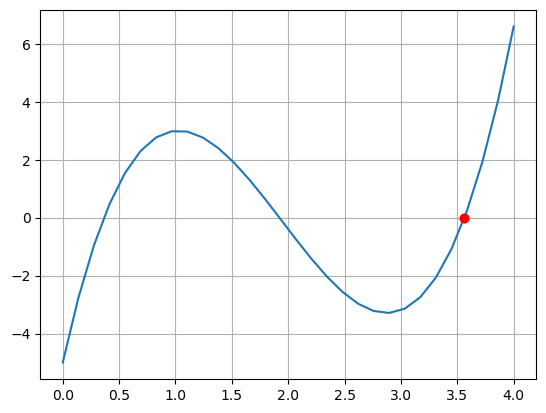

In [5]:
x = np.linspace(0, 4, 30)  

plt.grid()
plt.plot(x, f(x), [bisseccao(f, 3, 4)[0], bisseccao(f, 3, 4)[0]], [0,0], 'ro')  

#### (b) Pelo método da iteração de ponto fixo (três iterações, x0 = 3)( certifique-se de desenvolver uma solução que convirja para a raiz)

In [6]:
fixed_point(fp, 3, 3)

(3.442543246990202, 3)

#### (c) Pelo método de Newton-Raphson (três iterações, x0 = 3)

In [7]:
newton_raphson(f, fd, 3, 3)

(3.9483607355126975, 3)

#### (d) Pelo método da secante (três iterações, x−1 = 3, x0 = 4)

In [8]:
metodo_secante(f, 3, 4, 3)

(3.5037095168646224, 3)

## 4. Compare os métodos da bisseção, falsa posição, do ponto fixo, de Newton-Raphson e da secante, localizando a raiz das seguintes equações:


#### (a) $f1 (x) = 2x^4 + 4x^3 + 3x^2 − 10x − 15$, com x∗ ∈ [0, 3]


In [7]:
f = lambda x: 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15
fp = lambda x: (2*x**4 + 4*x**3 + 3*x**2 - 15)/10
fd = lambda x: 8*x**3 + 12*x**2 + 6*x - 10

print(bisseccao(f, 0, -3, 200, 1e-10))
print(fixed_point(fp, 0, 200, 1e-10))
print(newton_raphson(f, fd, 0, 200, 1e-10))
print(metodo_secante(f, 0, 3, 200, 1e-10))

(-1.300384283065796, 22)
(-1.3003841326707946, 35)
(-1.3003841326439198, 6)
(-1.3003841326439198, 9)


#### (b) $f2(x) = (x + 3)(x + 1)(x − 2)^3$, com x∗ ∈ [0, 5]


In [8]:
f = lambda x: x**5 - 2*x**4 - 9*x**3 + 22*x**2 + 4*x -24
#fp = lambda x: 
fd = lambda x: 5*x**4 - 8*x**3 - 18*x**2 + 44*x + 4

print(bisseccao(f, 0, 5, 200, 1e-10))
#print(fixed_point(fp, 5, 200, 1e-10))
print(newton_raphson(f, fd, 0, 200, 1e-10))
print(metodo_secante(f, 0, 5, 200, 1e-10))

(2.0000064373016357, 22)
(2.0822134585147825, 200)
(1.999992797247646, 48)


#### (c) $f3(x) = 5x^3 + x^2 − e^{1−2x} + cos(x) + 20$, com x∗ ∈ [−5, 5]

In [18]:
f = lambda x: 5*x**3 + x**2 - np.exp(1 - 2*x) + np.cos(x) + 20
#fp = lambda x: 
fd = lambda x: 15*x**2 + 2*x + np.exp(1 - 2*x)*2 - np.sin(x)

print(bisseccao(f, -5, 5, 200, 1e-10))
#print(fixed_point(fp, 0, 200, 1e-10))
print(newton_raphson(f, fd, -5, 200, 1e-10))
print(metodo_secante(f, -5, 5, 200, 1e-10))

(-0.9295600652694702, 24)
(inf, 6)
(-0.9295604598378413, 13)
(-0.9295604598378413, 24)


C:\Users\ismae\AppData\Local\Temp\ipykernel_4664\1327295873.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  err = np.abs(x - x_prev)/np.abs(x)
C:\Users\ismae\AppData\Local\Temp\ipykernel_4664\1857097682.py:2: RuntimeWarning: overflow encountered in double_scalars
  fp = lambda x: 5*x**3 + x**2 - np.exp(1 - 2*x) + np.cos(x) + 20 + x
C:\Users\ismae\AppData\Local\Temp\ipykernel_4664\1327295873.py:42: RuntimeWarning: invalid value encountered in double_scalars
  err = np.abs(x - x_prev)/np.abs(x)


#### (d) $f4(x) = sin(x)x + 4$, com x∗ ∈ [1, 5]

In [15]:
f = lambda x: np.sin(x)*x + 4
fp = lambda x: x + np.sin(x)*x + 4
fd = lambda x: x*np.cos(x) + np.sin(x)

print(bisseccao(f, 1, 5, 200, 1e-10))
print(fixed_point(fp, 1, 200, 1e-10))
print(newton_raphson(f, fd, 5, 200, 1e-10))
print(metodo_secante(f, 1, 5, 200, 1e-10))

(4.323238372802734, 20)
(4.689070677280189, 200)
(5.461308012588998, 7)
(4.323239543713715, 7)


#### (e) $f5(x) = (x − 3)^5ln(x)$, com x∗ ∈ [2, 5]

In [20]:
f = lambda x: (x - 3)**5 * np.log(x)
#fp = lambda x: 
fd = lambda x: 5*np.log(x)*(x-3)**4 + (x-3)**5/x

print(bisseccao(f, 2, 5, 200, 1e-10))
#print(fixed_point(fp, 0, 200, 1e-10))
print(newton_raphson(f, fd, 2, 200, 1e-10))
print(metodo_secante(f, 2, 5, 200, 1e-10))

(2.9999990463256836, 20)
(2.9999999989287707, 92)
(2.999999998229406, 130)


#### (f) $f6(x) = x^{10} − 1$, com x∗ ∈ [0.8, 1.2]

In [19]:
f = lambda x: x**10 -1
#fp = lambda x: 1/x**9
fd = lambda x: 9*x**9

print(bisseccao(f, 0.8, 1.2, 200, 1e-10))
#print(fixed_point(fp, 1.2, 200, 1e-10))
print(newton_raphson(f, fd, 0.8, 200, 1e-10))
print(metodo_secante(f, 0.8, 1.2, 200, 1e-10))

(1.1999992370605468, 19)
(0.9999999999988244, 15)
(1.0, 12)


Na maioria dos casos o Newton Raphson conseguiu menas iterações, tirando alguns casos onde ele precisou de muitas iterações para chegar próximo, o segundo melhor foi o da secante, que se saiu um pouco pior que o newton raphson, porém nos casos em que newton raphson foi pior, em um deles o da secante foi melhor... O método da bisseção é na maioria dos casos bom o suficiente mas não o melhor, mas também não é ruim, quando perde não perde por muito.

Vale salientar que na questão D, a função de newton Raphson pegou a outra raiz por algum motivo, mas tirando isso todos se saíram bem próximos, e em alguns casos quase idênticos.

Meu maior problema foi o do ponto fixo, que em muitos casos não consegui encontrar uma função que não estourasse o algoritmo, dando overflow ou divisão por zero... 